
---
# **1. Instal API Kaggle**
---



Langkah langkah :
1. install kaggle API pada Colab dengan menggunakan perintah berikut: 
   !pip install kaggle
2. Setelah itu, buka halaman Kaggle, lalu masuk ke bagian "Account" dan klik tombol "Create API Token". Ini akan mengunduh file "kaggle.json" ke komputer Anda.
3. Jalankan kode dibawah pada Colab untuk menghubungkan ke Google Drive dan mengatur konfigurasi API Kaggle
4. Upload file "kaggle.json" ke Google Drive Anda sesuai folder dibawah.
5. Jalankan perintah berikut untuk mengunduh dataset:

In [ ]:
#perintah nomor [1]
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#perintah nomor [3]
from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Proyek Capstone/Hotel Reservations.csv"

Mounted at /content/drive


In [ ]:
#perintah nomor [5]
!kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset -p /content/drive/MyDrive/Proyek Capstone/Hotel Reservations.csv

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/drive/MyDrive/Proyek Capstone/Hotel Reservations.csv. Or use the environment method.


---

# **2. Eksplorasi Data File**


---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset-Kaggle/hotel-reservations-classification-dataset.zip')
df

In [ ]:
#Meihat dimensi data
df.shape

(36275, 19)

In [ ]:
#Gunakan sweetviz untuk EDA
!pip install sweetviz
import sweetviz as sv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 78.2 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


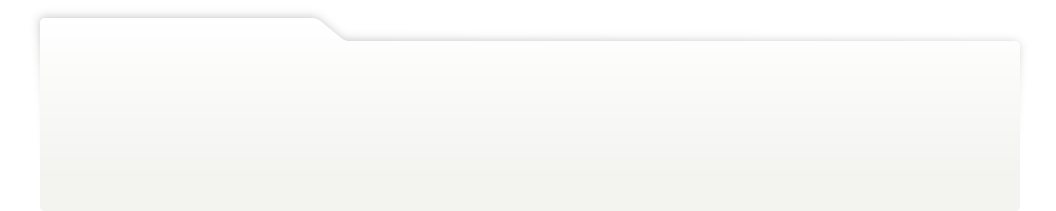
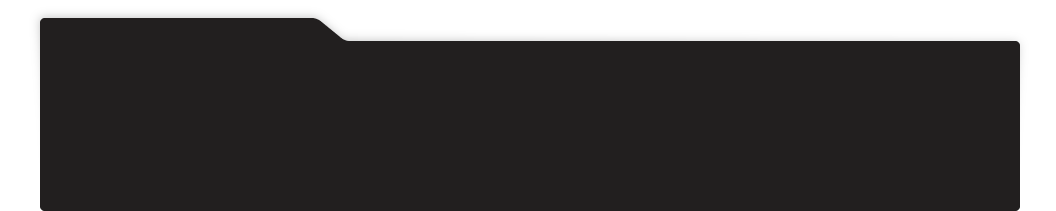
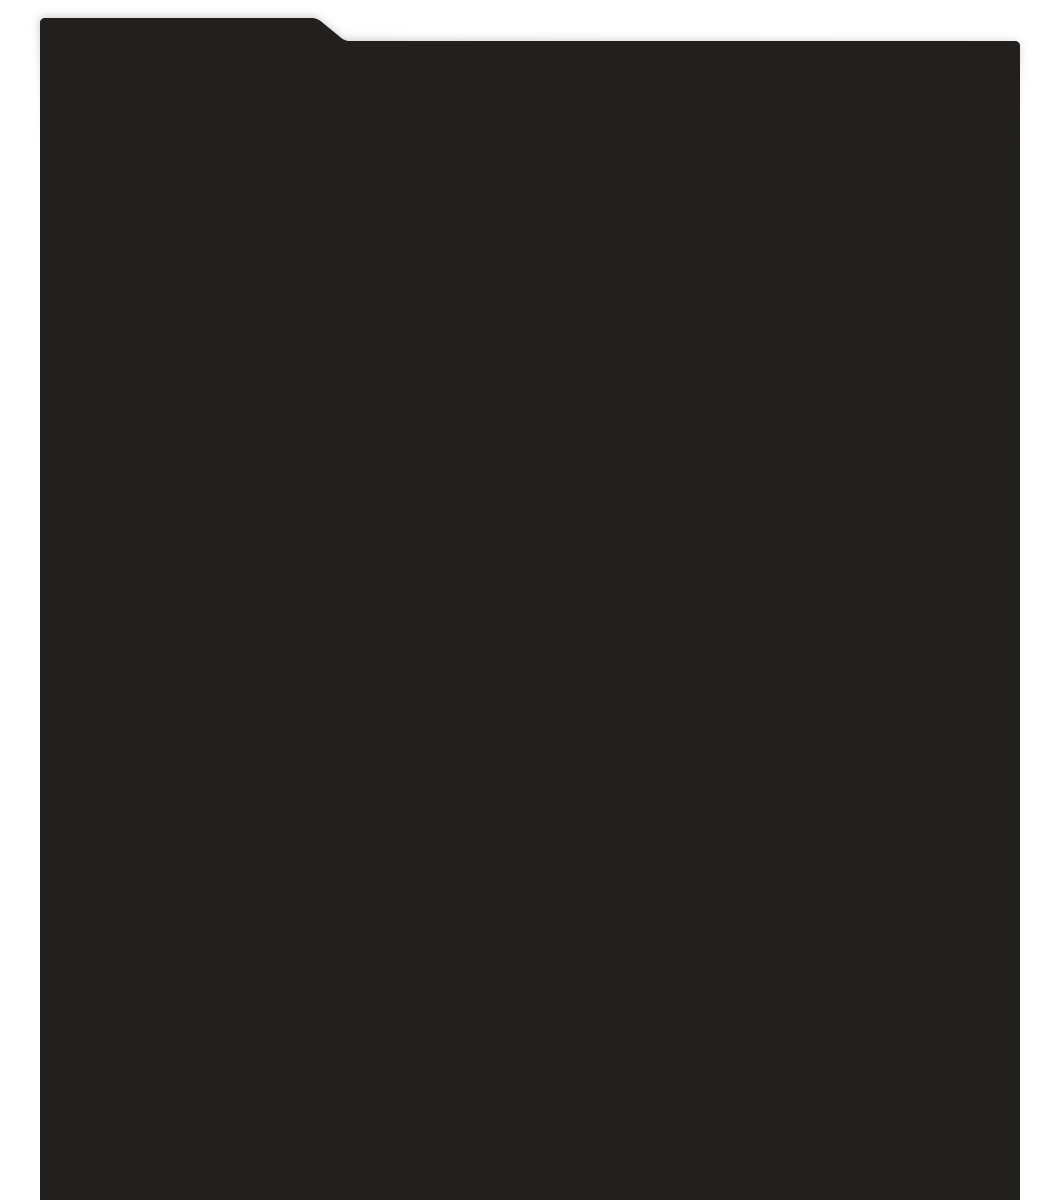
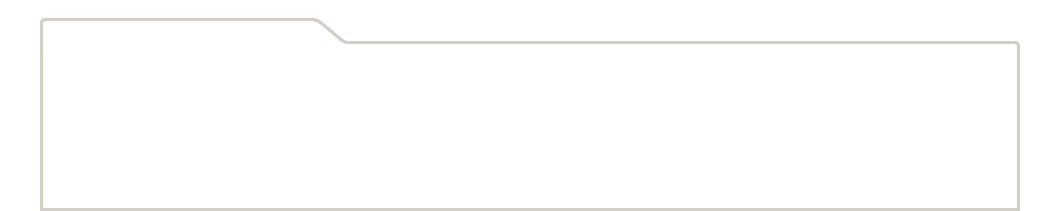
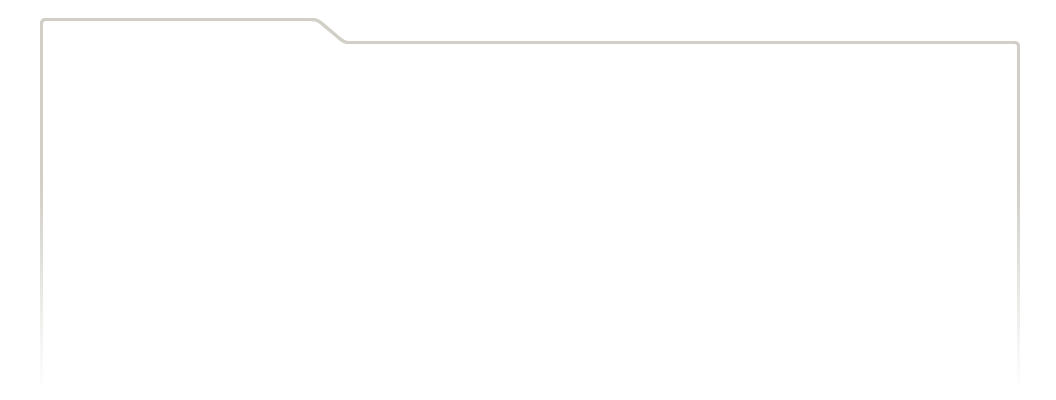
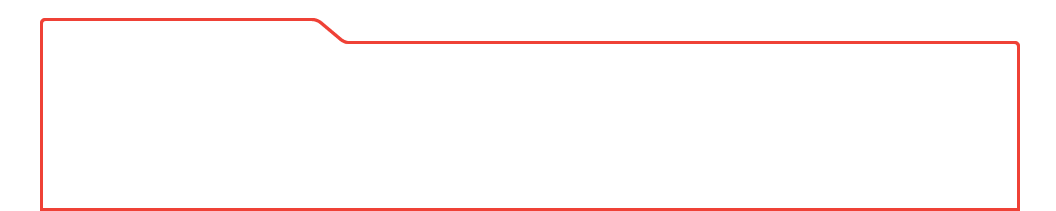
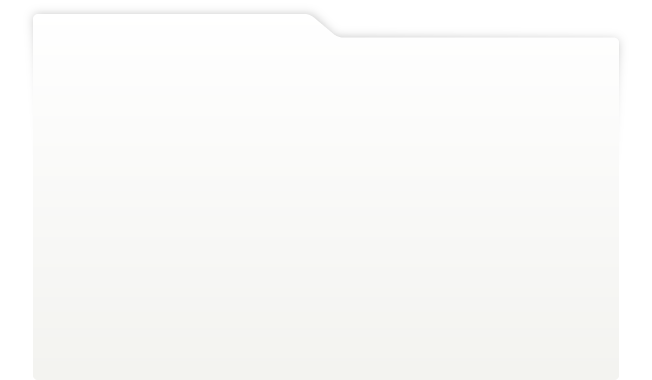
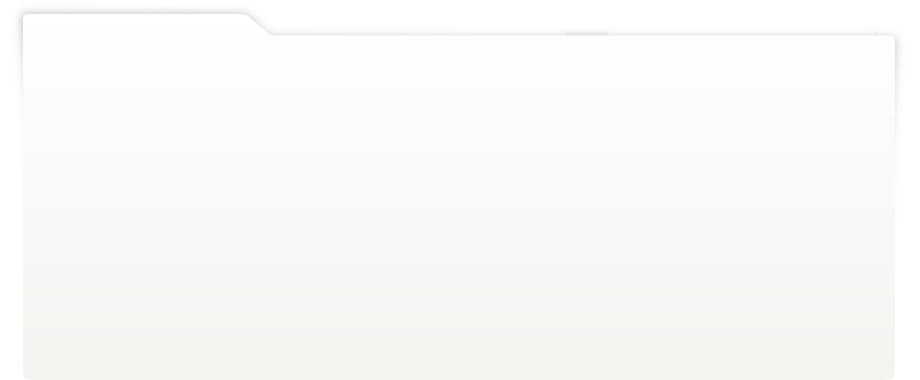
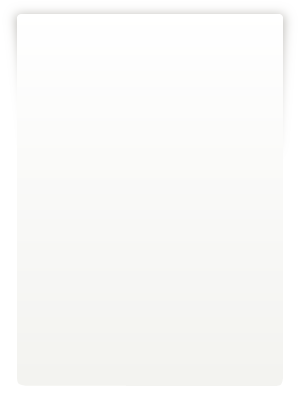
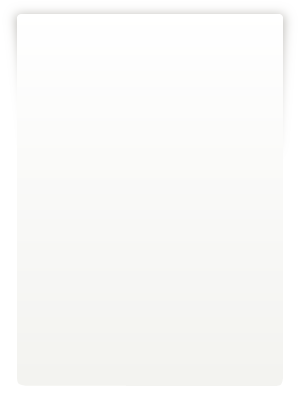
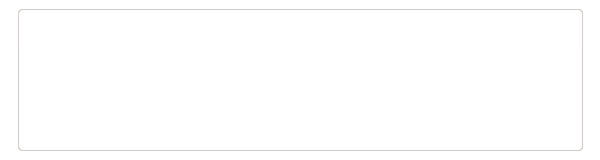
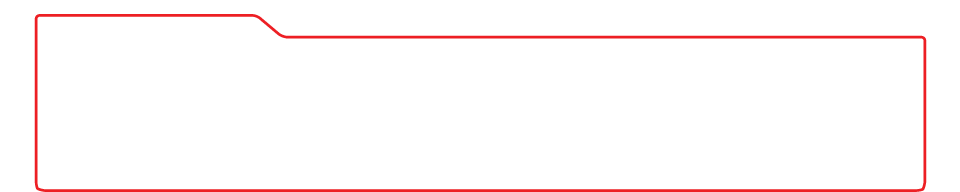
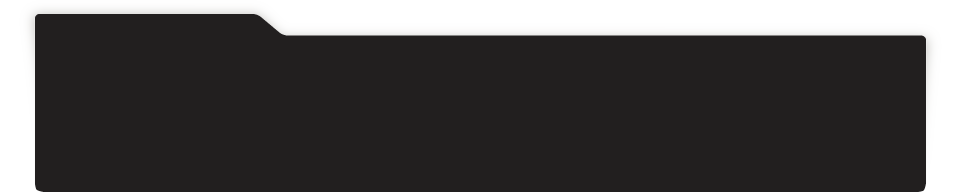
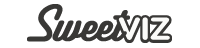
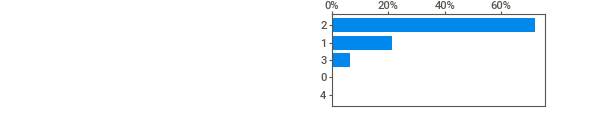
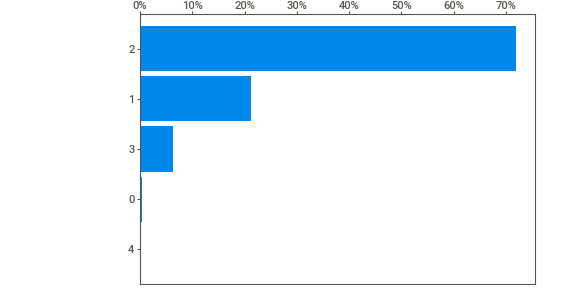
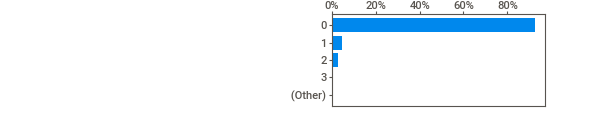
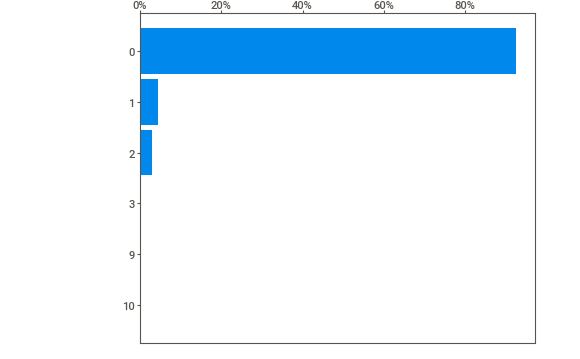
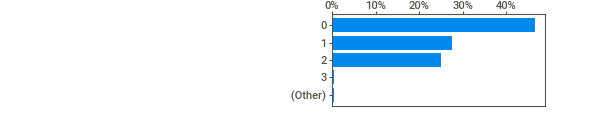
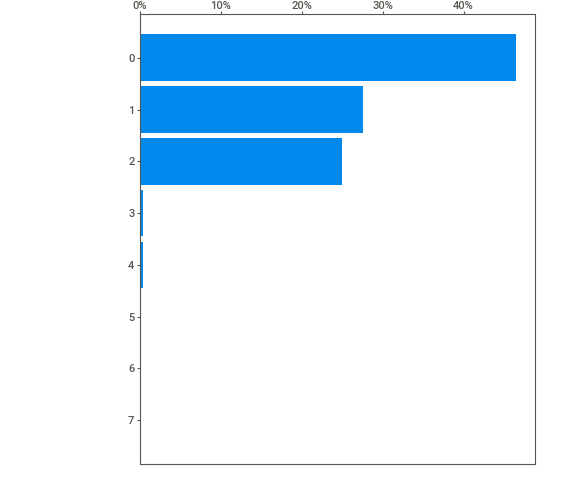
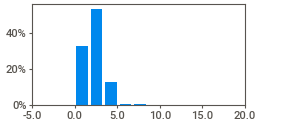
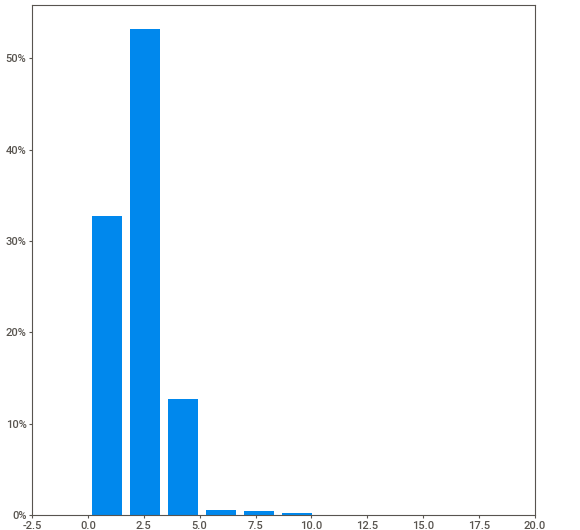
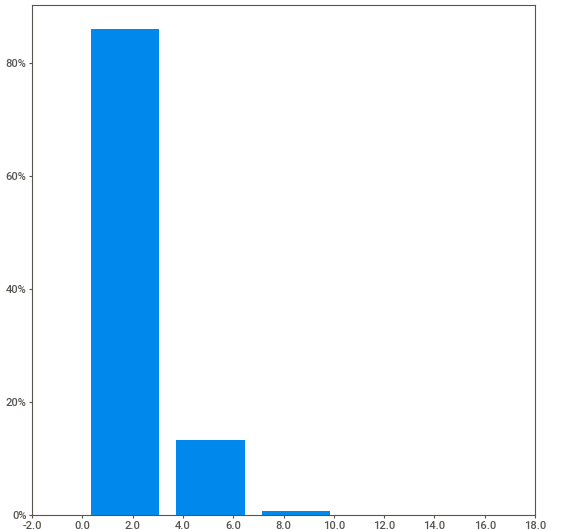
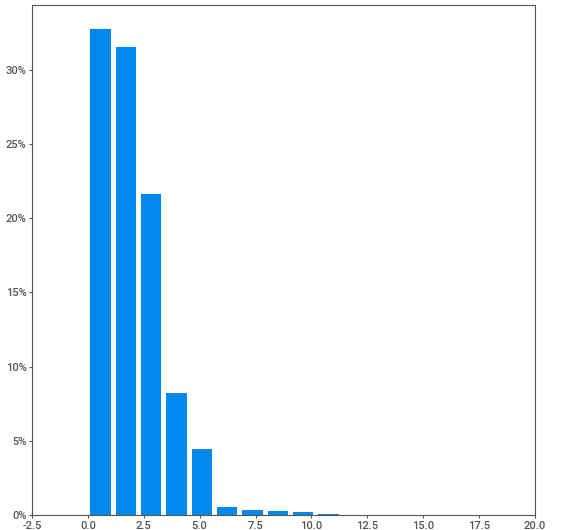
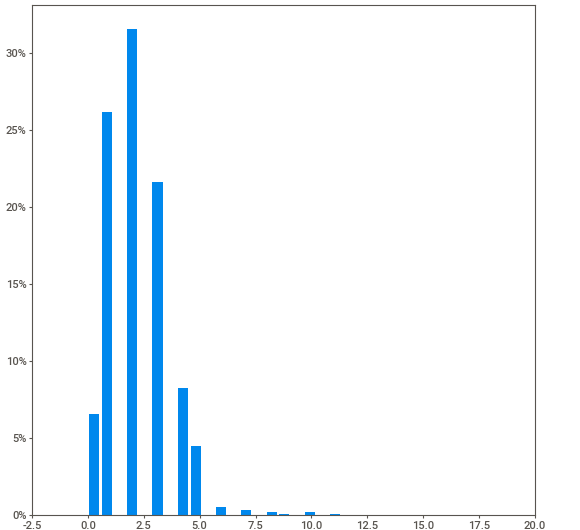
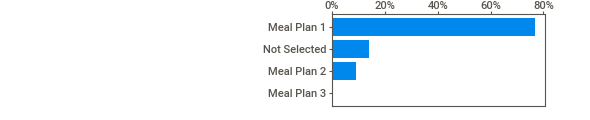
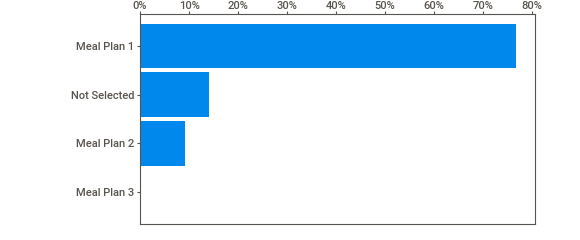
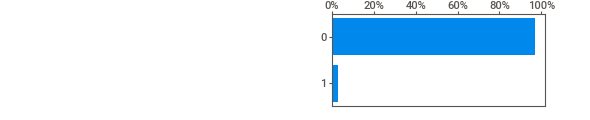
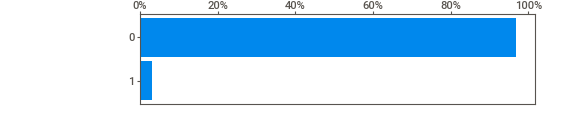
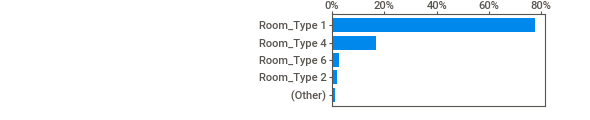
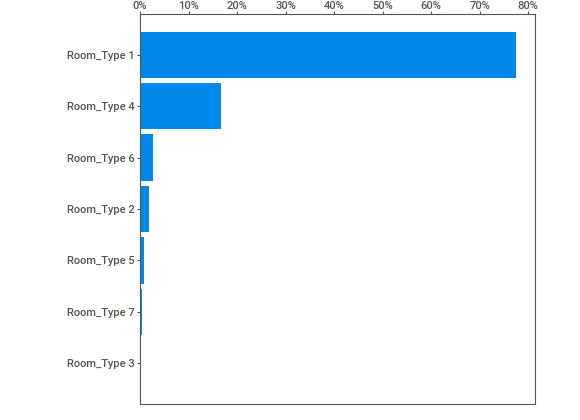
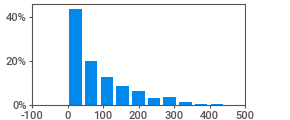
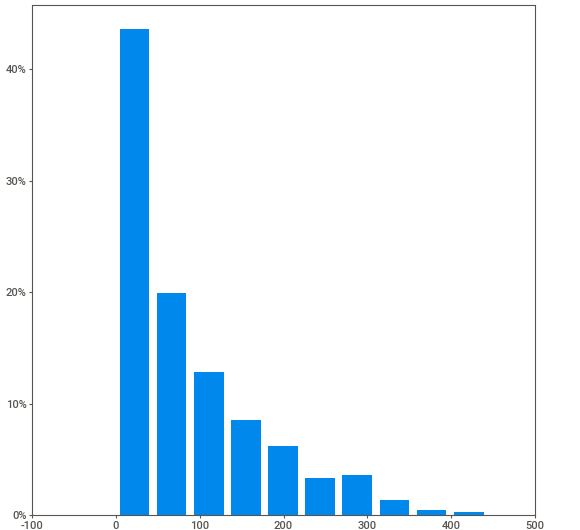
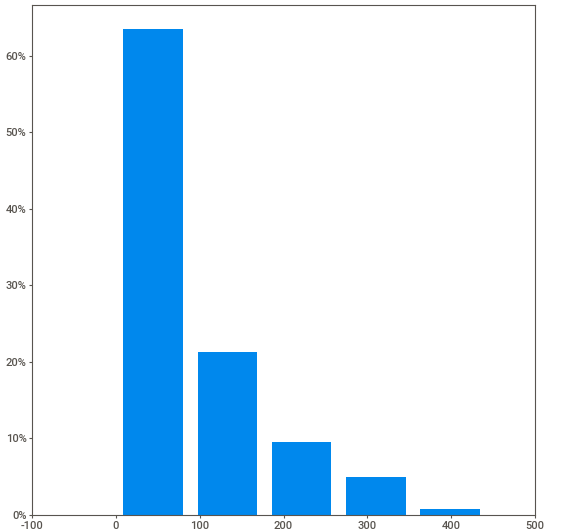
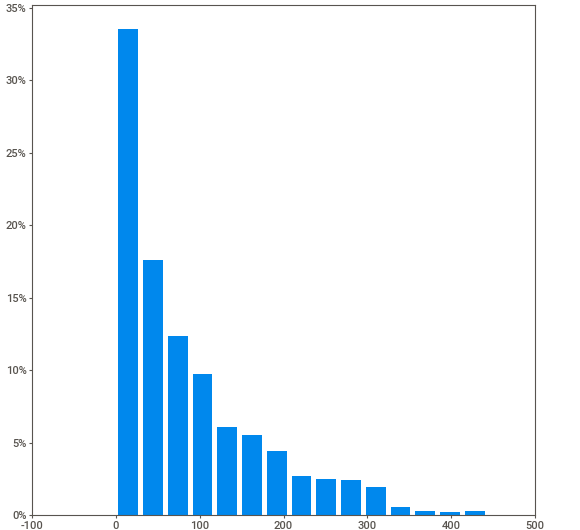
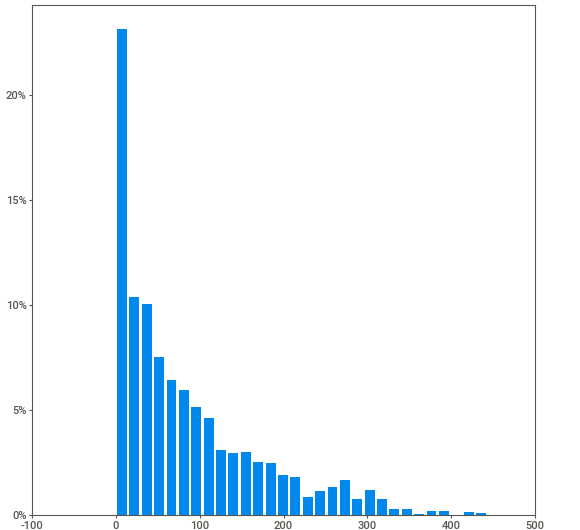
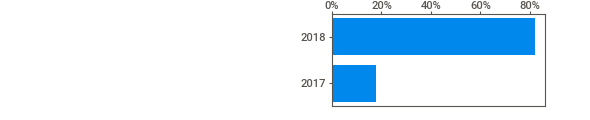
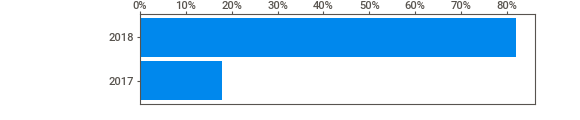
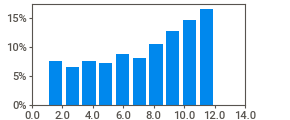
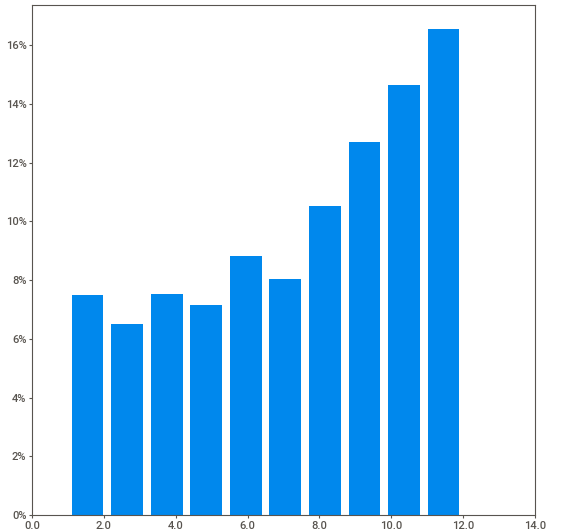
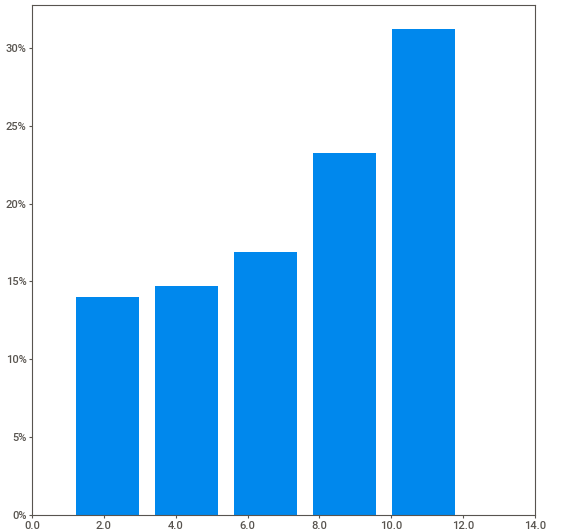
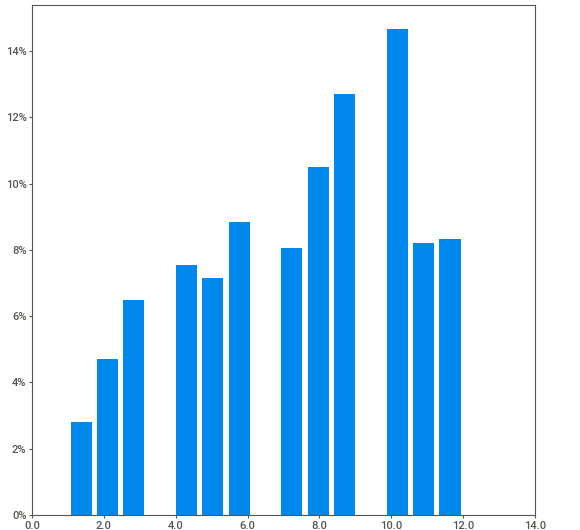
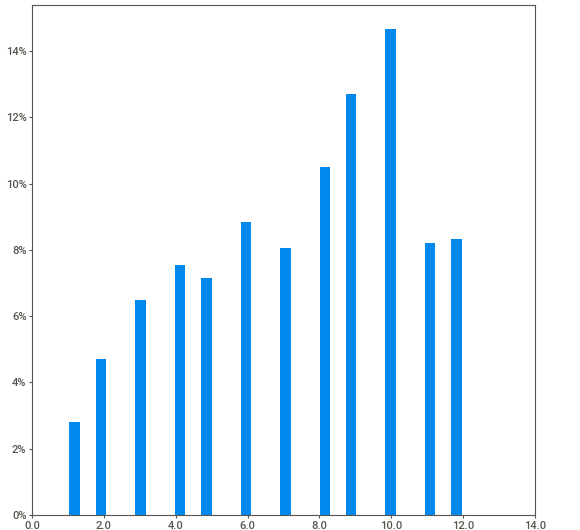
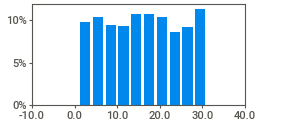
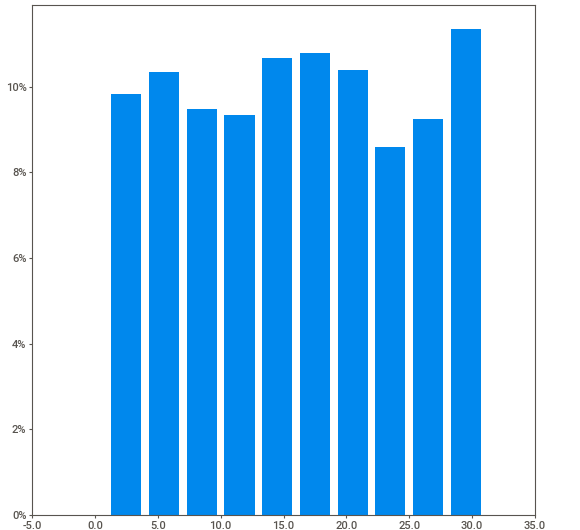
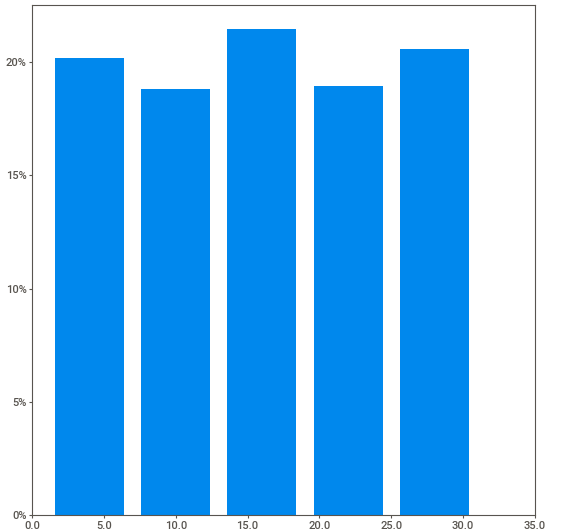
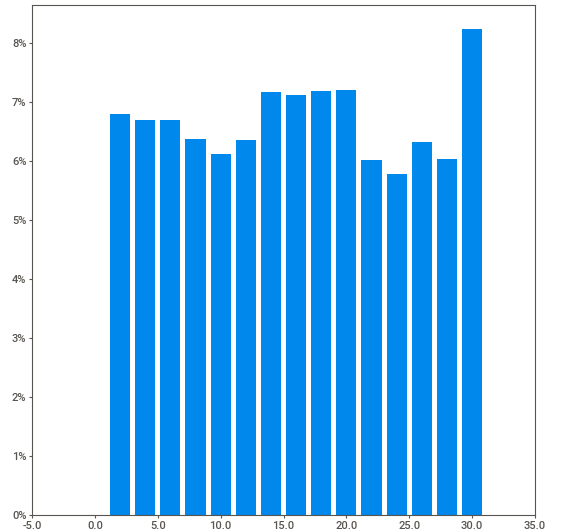
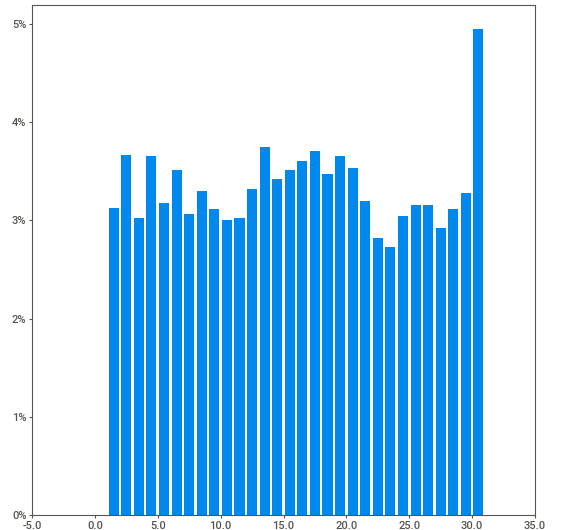
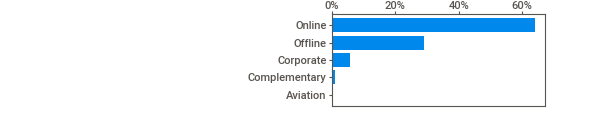
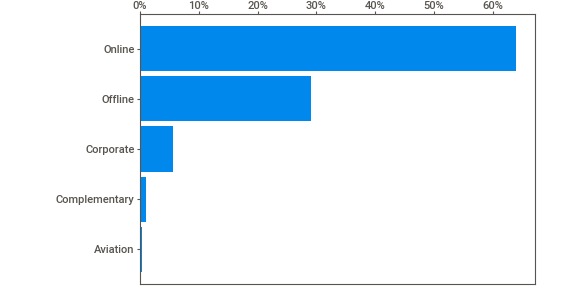
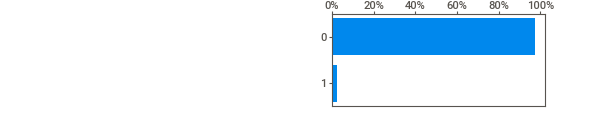
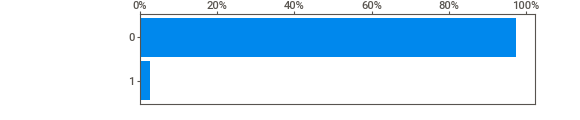
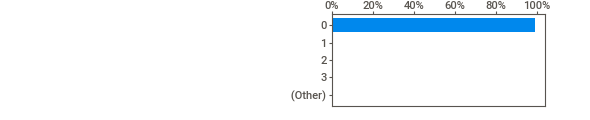
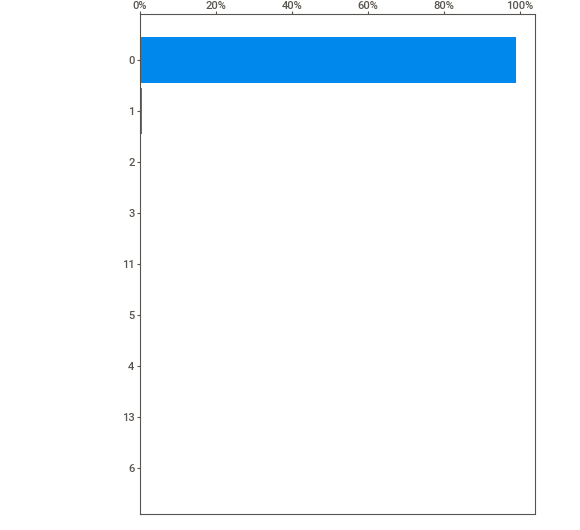
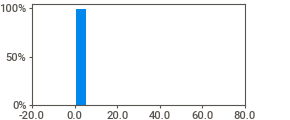
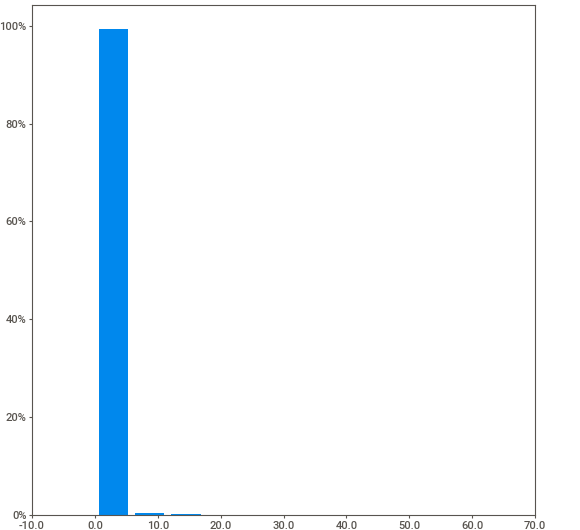
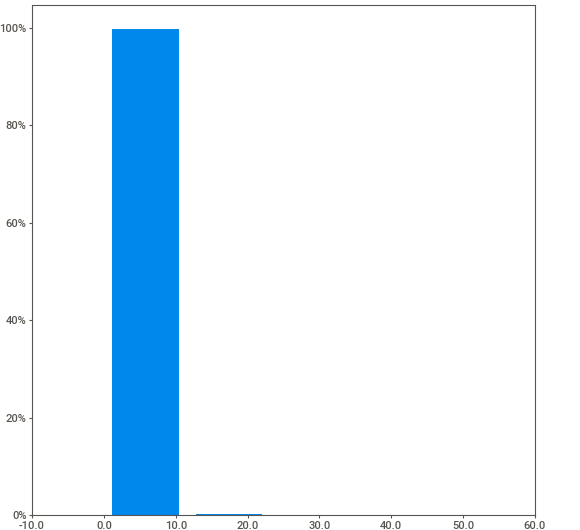
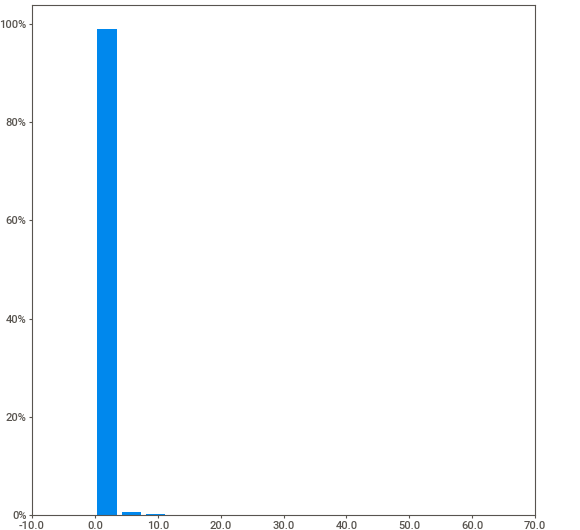
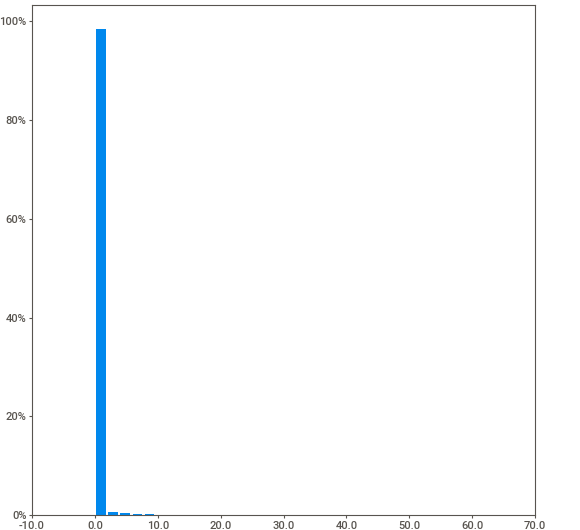
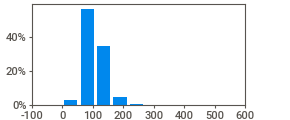
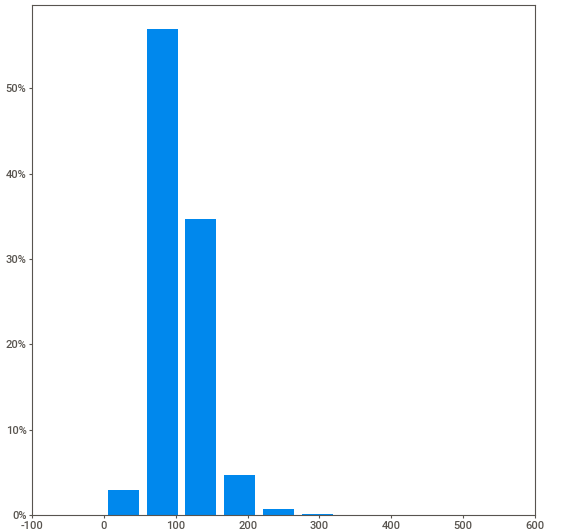
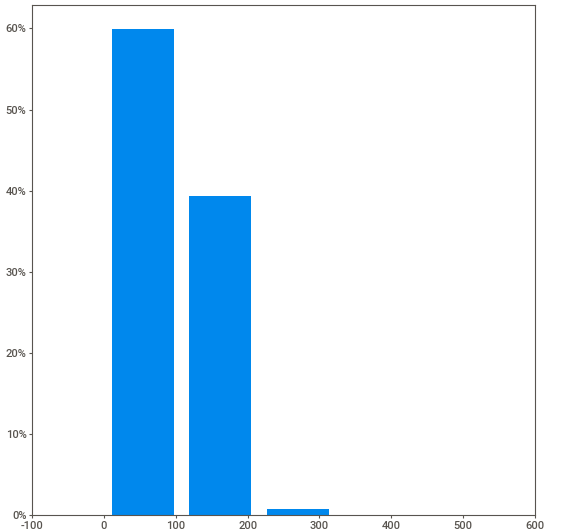
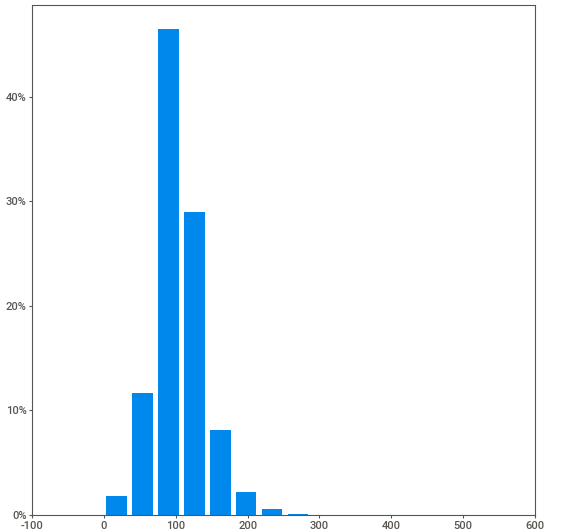
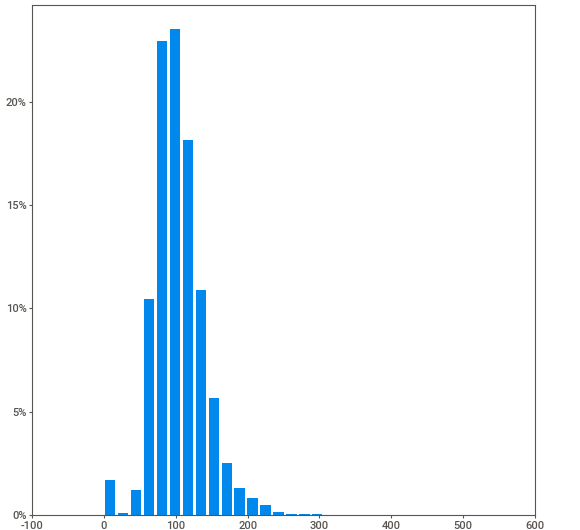
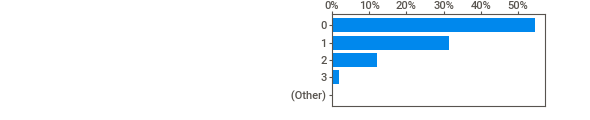
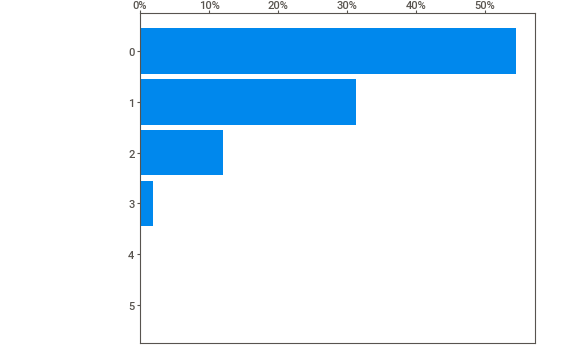
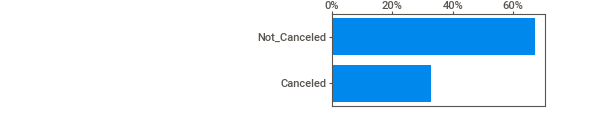
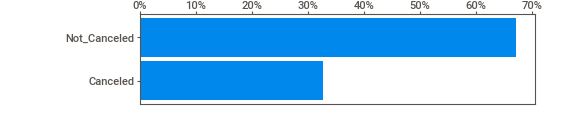
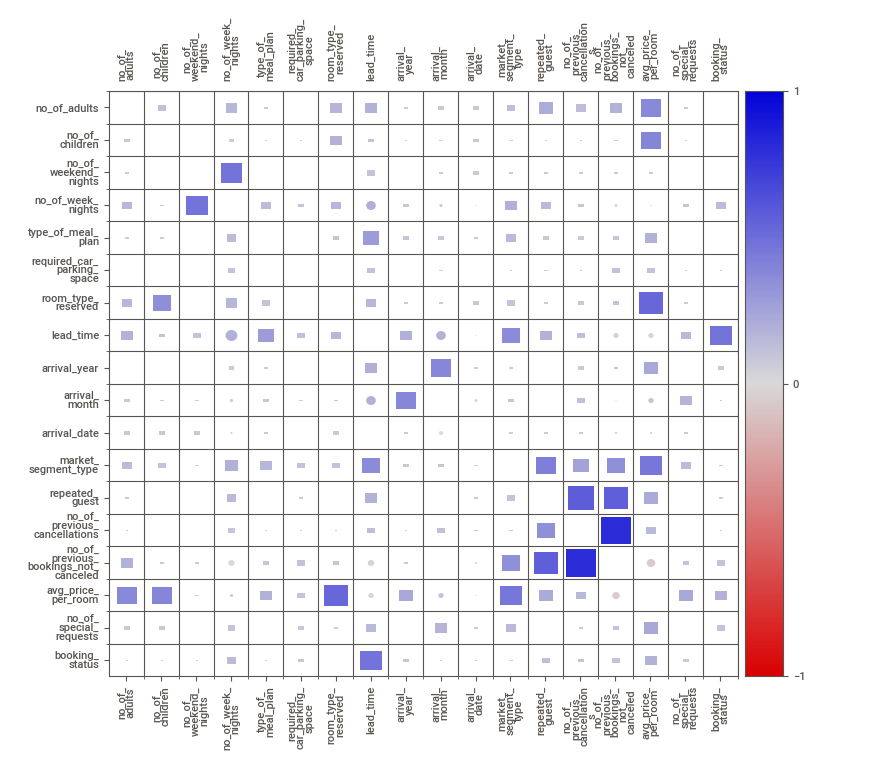
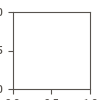

In [ ]:
report = sv.analyze(df)
report.show_notebook()

--- Jika tidak menggunakan sweetviz ---

In [ ]:
# Melihat ringkasan statistik
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [ ]:
# Mengetahui jenis data dan jumlah nilai yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Mencari nilai yang hilang
print(df.isnull())

# Mengetahui jumlah nilai yang hilang pada setiap kolom
print(df.isnull().sum())

       Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0           False         False           False                 False   
1           False         False           False                 False   
2           False         False           False                 False   
3           False         False           False                 False   
4           False         False           False                 False   
...           ...           ...             ...                   ...   
36270       False         False           False                 False   
36271       False         False           False                 False   
36272       False         False           False                 False   
36273       False         False           False                 False   
36274       False         False           False                 False   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  False              False     

<Axes: >

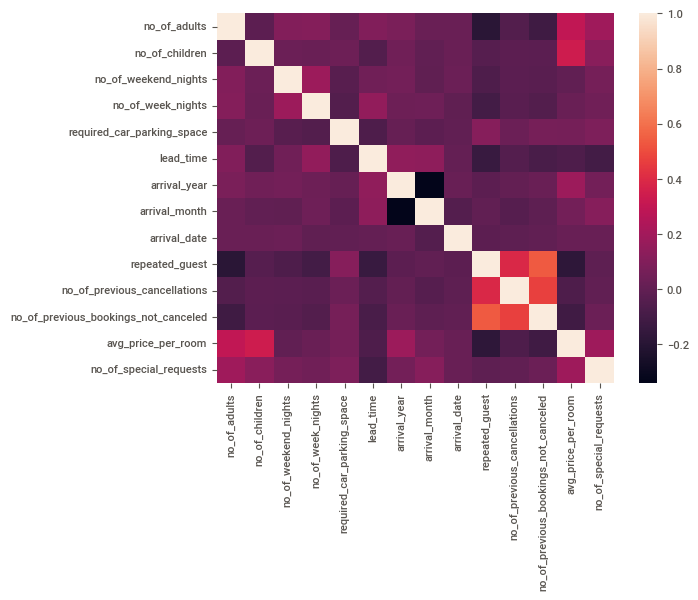

In [ ]:
import seaborn as sns

# Melihat korelasi antara variabel
sns.heatmap(df.corr())

array([[<Axes: title={'center': 'no_of_adults'}>]], dtype=object)

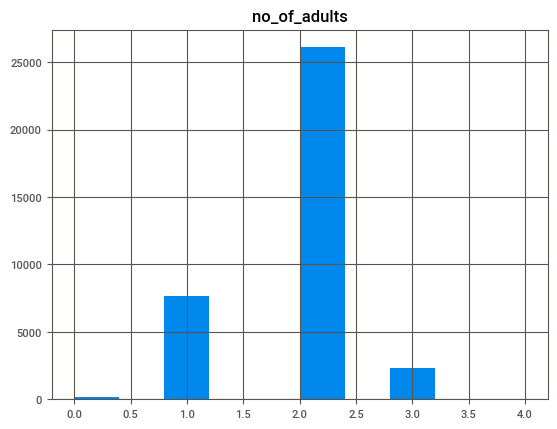

In [ ]:
# Melihat distribusi data
df.hist(column='no_of_adults')

<Axes: >

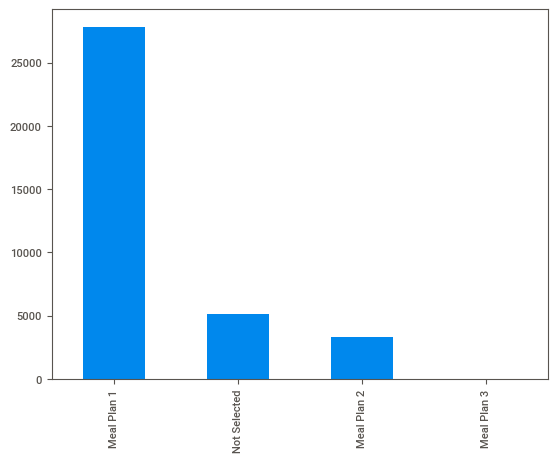

In [ ]:
# Melihat distribusi data kategori
df['type_of_meal_plan'].value_counts().plot(kind='bar')

<Axes: >

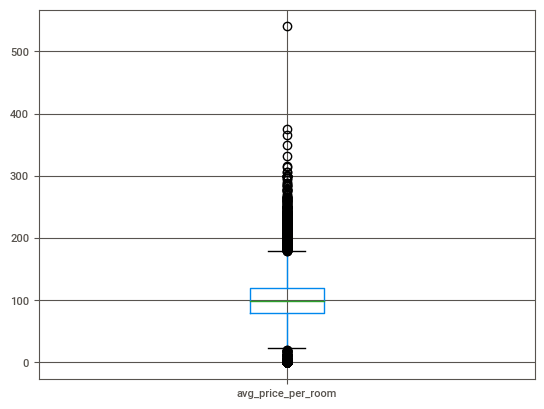

In [ ]:
# Menemukan outlier
df.boxplot(column='avg_price_per_room')

---

# **3. Pre-Processing**
---



a. Pembersihan data
*   Kolom 'Booking_ID' dihapus menggunakan metode drop dengan parameter axis=1 yang mengindikasikan kolom yang akan dihapus.
*   Baris dengan nilai yang hilang dihapus menggunakan metode dropna untuk menghapus baris dengan nilai yang hilang atau NaN.
*   Kolom 'room_type_reserved' diubah tipe datanya menjadi string menggunakan metode apply dengan fungsi lambda yang mengubah nilai kolom menjadi string.
*   Kolom 'room_type_reserved' dan 'type_of_meal_plan' dilakukan encoding menggunakan LabelEncoder dari library sklearn.preprocessing. Fungsi ini digunakan untuk mengubah nilai kategorikal menjadi numerik, sehingga dapat digunakan dalam model prediksi.








In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset-Kaggle/hotel-reservations-classification-dataset.zip')
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
data = df

# menghapus kolom yang tidak diperlukan
data.drop(['Booking_ID'], axis=1, inplace=True)

# menghapus baris dengan nilai yang hilang
data.dropna(inplace=True)

# mengubah tipe data kolom room_type_reserved menjadi string
data['room_type_reserved'] = data['room_type_reserved'].apply(lambda x: str(x))

# Mapping nilai-nilai baru
mapping = {
    0: 'Offline',
    1: 'Online',
    2: 'Corporate'
}

# melakukan encoding untuk kolom room_type_reserved dan type_of_meal_plan
le = LabelEncoder()
data['room_type_reserved'] = le.fit_transform(data['room_type_reserved'])
data['type_of_meal_plan'] = le.fit_transform(data['type_of_meal_plan'])
data['market_segment_type'] = le.fit_transform(data['market_segment_type'])
data['market_segment_type'].map(mapping)

oe = OrdinalEncoder(dtype=int)
data['booking_status'] = le.fit_transform(data['booking_status'])

data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


In [ ]:
data.head(25)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
5,2,0,0,2,1,0,0,346,2018,9,13,4,0,0,0,115.00,1,0
6,2,0,1,3,0,0,0,34,2017,10,15,4,0,0,0,107.55,1,1
7,2,0,1,3,0,0,3,83,2018,12,26,4,0,0,0,105.61,1,1
8,3,0,0,4,0,0,0,121,2018,7,6,3,0,0,0,96.90,1,1
9,2,0,0,5,0,0,3,44,2018,10,18,4,0,0,0,133.44,3,1


b. Split Data Train dan Data Test

In [ ]:
from sklearn.model_selection import train_test_split

# selected_features = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'type_of_meal_plan', 
#                      'required_car_parking_space', 'lead_time', 'market_segment_type', 
#                      'repeated_guest', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 
#                      'no_of_special_requests']

# memilih fitur yang akan digunakan
x = data.drop(['arrival_year', 'arrival_month', 'arrival_date', 'room_type_reserved'], axis=1)
y = data['room_type_reserved']

# membagi data menjadi train set dan test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


---

# **4. Random Forest Classifier**
---



In [ ]:
# Import library
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
rfc.fit(x_train, y_train)

# Prediksi
y_pred_rfc = rfc.predict(x_test)

# Evaluasi model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rfc))
print("Accuracy score:", accuracy_score(y_test, y_pred_rfc))
print("Precision score:", precision_score(y_test, y_pred_rfc, average='weighted'))
print("Recall score:", recall_score(y_test, y_pred_rfc, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred_rfc, average='weighted'))


Confusion matrix:
 [[5478    9    0  148    2    3    1]
 [  58   57    0    3    1    6    0]
 [   2    0    0    0    0    0    0]
 [ 402    0    0  808    1    3    2]
 [  30    1    0   10   10    0    0]
 [  16    2    0   15    0  160    0]
 [   7    1    0    5    0    9    5]]
Accuracy score: 0.8984148862853205
Precision score: 0.8925433025627614
Recall score: 0.8984148862853205
F1 score: 0.891117284514515


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---

# **5. Support Vector Classifier**
---

In [ ]:
# Import library
from sklearn.svm import SVC

# Inisialisasi model
svm = SVC(kernel='linear', random_state=42)

# Latih model
svm.fit(x_train, y_train)

# Prediksi
y_pred_svm = svm.predict(x_test)

# Evaluasi model
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy score:", accuracy_score(y_test, y_pred_svm))
print("Precision score:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall score:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred_svm, average='weighted'))

Confusion matrix:
 [[5538    0    0  100    0    2    1]
 [ 119    0    0    0    0    6    0]
 [   2    0    0    0    0    0    0]
 [ 793    0    0  421    0    2    0]
 [  44    0    0    5    0    1    1]
 [  27    0    0   13    0  153    0]
 [  12    0    0    7    0    8    0]]
Accuracy score: 0.8424534803583735
Precision score: 0.8118102529189967
Recall score: 0.8424534803583735
F1 score: 0.8096858153500534


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---

# **6. K-Nearest Neighbors(KNN) Classifier**
---

In [ ]:
# Import library
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model
knn = KNeighborsClassifier(n_neighbors=5)

# Latih model
knn.fit(x_train, y_train)

# Prediksi
y_pred_knn = knn.predict(x_test)

# Evaluasi model
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy score:", accuracy_score(y_test, y_pred_knn))
print("Precision score:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall score:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred_knn, average='weighted'))


Confusion matrix:
 [[5338   17    0  269    4   13    0]
 [  99   18    0    4    1    2    1]
 [   1    0    0    1    0    0    0]
 [ 532    4    0  666    3   11    0]
 [  34    0    0   12    2    3    0]
 [  40    1    0   49    0  102    1]
 [  11    0    0    5    0    9    2]]
Accuracy score: 0.8446588559614059
Precision score: 0.8268247756706113
Recall score: 0.8446588559614059
F1 score: 0.8311965147733443


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Berdasarkan 3 metode tersebut diperoleh nilai akurasi paling tinggi yaitu pada random forrest sebesar 0,89**

In [ ]:
Accuracy_RFC: 0.8984148862853205
Accuracy_SVM: 0.8424534803583735
Accuracy_KNN: 0.8446588559614059

Precision_RFC: 0.8925433025627614
Precision_SVM: 0.8118102529189967
Precision_KNN: 0.8268247756706113

Recall_RFC: 0.8984148862853205
Recall_SVM: 0.8424534803583735
Recall_KNN: 0.8446588559614059

F1_RFC: 0.891117284514515
F1_SVM: 0.8096858153500534
F1_KNN: 0.8311965147733443

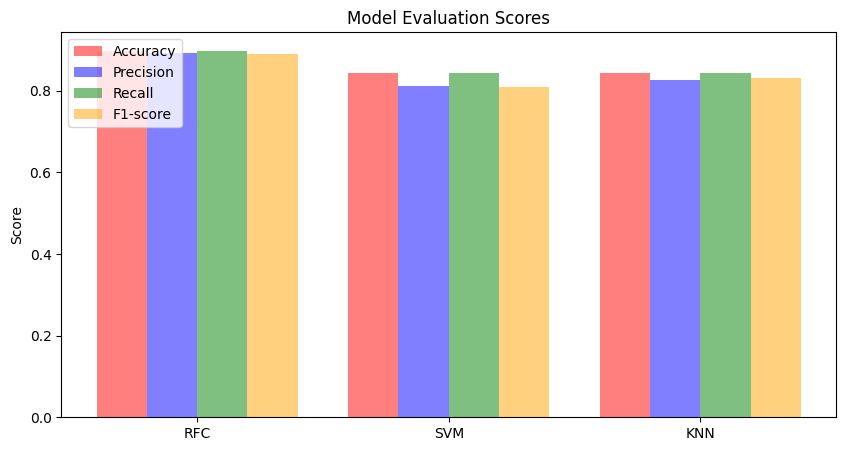

In [ ]:
# Data
labels = ['RFC', 'SVM', 'KNN']
accuracy = [0.8984148862853205, 0.8424534803583735, 0.8446588559614059]
precision = [0.8925433025627614, 0.8118102529189967, 0.8268247756706113]
recall = [0.8984148862853205, 0.8424534803583735, 0.8446588559614059]
f1_score = [0.891117284514515, 0.8096858153500534, 0.8311965147733443]

# Setting the positions and width for the bars
pos = list(range(len(labels)))
width = 0.2

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bars with different colors
ax.bar(pos, accuracy, width, alpha=0.5, color='red', label='Accuracy')
ax.bar([p + width for p in pos], precision, width, alpha=0.5, color='blue', label='Precision')
ax.bar([p + width*2 for p in pos], recall, width, alpha=0.5, color='green', label='Recall')
ax.bar([p + width*3 for p in pos], f1_score, width, alpha=0.5, color='orange', label='F1-score')

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Model Evaluation Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(labels)

# Adding the legend and showing the plot
plt.legend(['Accuracy', 'Precision', 'Recall', 'F1-score'], loc='upper left')
plt.show()


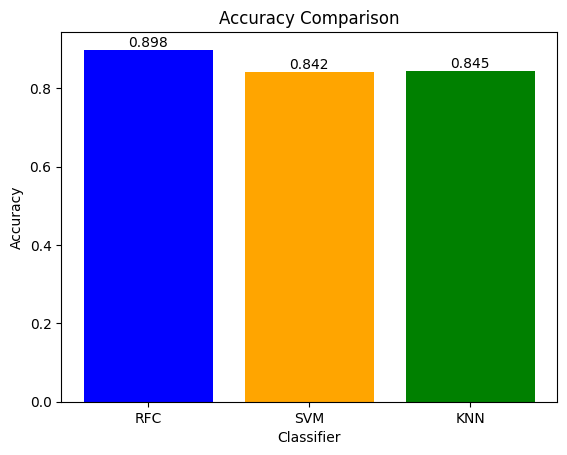

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
accuracy = [0.8984148862853205, 0.8424534803583735, 0.8446588559614059]
labels = ['RFC', 'SVM', 'KNN']

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(labels, accuracy, color=['blue', 'orange', 'green'])

# Menambahkan label angka pada tiap bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

plt.show()

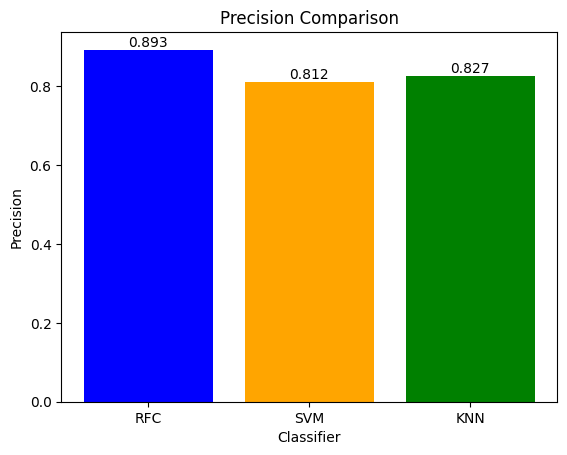

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['RFC', 'SVM', 'KNN']
precision = [0.8925433025627614, 0.8118102529189967, 0.8268247756706113]

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(labels, precision, color=['blue', 'orange', 'green'])

# Menambahkan label angka pada tiap bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')


plt.title('Precision Comparison')
plt.xlabel('Classifier')
plt.ylabel('Precision')

plt.show()

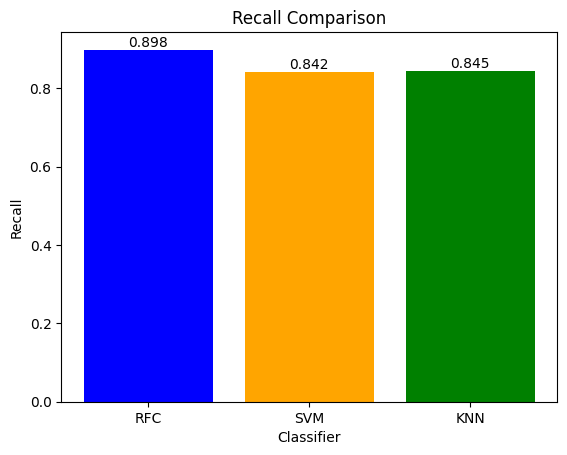

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['RFC', 'SVM', 'KNN']
Recall = [0.8984148862853205, 0.8424534803583735, 0.8446588559614059]

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(labels, Recall, color=['blue', 'orange', 'green'])

# Menambahkan label angka pada tiap bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')


plt.title('Recall Comparison')
plt.xlabel('Classifier')
plt.ylabel('Recall')

plt.show()

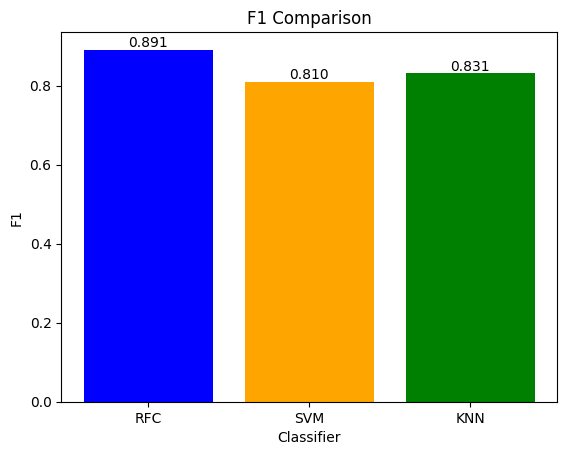

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['RFC', 'SVM', 'KNN']
F1 = [0.891117284514515, 0.8096858153500534, 0.8311965147733443]

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(labels, F1, color=['blue', 'orange', 'green'])

# Menambahkan label angka pada tiap bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')


plt.title('F1 Comparison')
plt.xlabel('Classifier')
plt.ylabel('F1')

plt.show()